# Imports

In [1]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Data exploration

In [2]:
from pyhdf.SD import SD, SDC

file_path = "./AIRS3STD v7.0/AIRS.2011.01.03.L3.RetStd_IR001.v7.0.3.0.G20156164823.hdf"
hdf = SD(file_path, SDC.READ)

# Print available datasets
print("Datasets:")
for dataset in hdf.datasets():
    print(f"- {dataset}, Shape: {hdf.select(dataset).info()[0]}")

# Print global attributes
print("\nGlobal Attributes:")
for attr in hdf.attributes():
    print(f"- {attr}: {hdf.attributes()[attr]}")


Datasets:
- TotalCounts_A, Shape: TotalCounts_A
- SurfPres_Forecast_A, Shape: SurfPres_Forecast_A
- SurfPres_Forecast_A_ct, Shape: SurfPres_Forecast_A_ct
- SurfPres_Forecast_A_sdev, Shape: SurfPres_Forecast_A_sdev
- SurfSkinTemp_A, Shape: SurfSkinTemp_A
- SurfSkinTemp_A_ct, Shape: SurfSkinTemp_A_ct
- SurfSkinTemp_A_sdev, Shape: SurfSkinTemp_A_sdev
- EmisIR_A, Shape: EmisIR_A
- EmisIR_A_ct, Shape: EmisIR_A_ct
- EmisIR_A_sdev, Shape: EmisIR_A_sdev
- Temperature_A, Shape: Temperature_A
- Temperature_A_ct, Shape: Temperature_A_ct
- Temperature_A_sdev, Shape: Temperature_A_sdev
- SurfAirTemp_A, Shape: SurfAirTemp_A
- SurfAirTemp_A_ct, Shape: SurfAirTemp_A_ct
- SurfAirTemp_A_sdev, Shape: SurfAirTemp_A_sdev
- TropPres_A, Shape: TropPres_A
- TropPres_A_ct, Shape: TropPres_A_ct
- TropPres_A_sdev, Shape: TropPres_A_sdev
- TropTemp_A, Shape: TropTemp_A
- TropTemp_A_ct, Shape: TropTemp_A_ct
- TropTemp_A_sdev, Shape: TropTemp_A_sdev
- TotH2OVap_A, Shape: TotH2OVap_A
- TotH2OVap_A_ct, Shape: TotH2OV

- StructMetadata.1: _FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_58
			OBJECT=DataField_59
				DataFieldName="CloudTopTemp_D"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_59
			OBJECT=DataField_60
				DataFieldName="CloudTopTemp_D_ct"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_60
			OBJECT=DataField_61
				DataFieldName="CloudTopTemp_D_sdev"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_61
			OBJECT=DataField_62
				DataFieldName="FineCloudFrc_D"
				DataType=DFNT_FLOAT32
				DimList=("FineCloudLayer","YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_62
			OBJECT=DataField_63
				DataFieldName="FineClou

- coremetadata: 
GROUP                  = INVENTORYMETADATA
  GROUPTYPE            = MASTERGROUP

  GROUP                  = ECSDATAGRANULE

    OBJECT                 = LOCALGRANULEID
      NUM_VAL              = 1
      VALUE                = "AIRS.2011.01.03.L3.RetStd_IR001.v7.0.3.0.G20156164823.hdf"
    END_OBJECT             = LOCALGRANULEID

    OBJECT                 = PRODUCTIONDATETIME
      NUM_VAL              = 1
      VALUE                = "2020-06-04T20:48:23.000Z"
    END_OBJECT             = PRODUCTIONDATETIME

    OBJECT                 = LOCALVERSIONID
      NUM_VAL              = 1
      VALUE                = "Unspecified"
    END_OBJECT             = LOCALVERSIONID

  END_GROUP              = ECSDATAGRANULE

  GROUP                  = MEASUREDPARAMETER

    OBJECT                 = MEASUREDPARAMETERCONTAINER
      CLASS                = "1"

      GROUP                  = QAFLAGS
        CLASS                = "1"

        OBJECT                 = AUTOMATICQUALITY

In [3]:
from pyhdf.SD import SD, SDC

file_path = "./AIRS3STD v7.0/AIRS.2011.01.03.L3.RetStd_IR001.v7.0.3.0.G20156164823.hdf"
hdf = SD(file_path, SDC.READ)

# Extract Cloud Fraction for Ascending Orbit
cloud_fraction = hdf.select("CloudFrc_A")[:]

print("Cloud Fraction (Ascending):")
print(cloud_fraction)
print("Shape:", cloud_fraction.shape)


Cloud Fraction (Ascending):
[[-9.9990000e+03 -9.9990000e+03 -9.9990000e+03 ... -9.9990000e+03
  -9.9990000e+03 -9.9990000e+03]
 [-9.9990000e+03  9.8437500e-01  9.4726562e-02 ...  0.0000000e+00
  -9.9990000e+03  2.1093750e-01]
 [ 2.0800781e-01  5.8837891e-02 -9.9990000e+03 ...  9.0234375e-01
   7.8125000e-01  6.0937500e-01]
 ...
 [ 3.1054688e-01  2.4707031e-01 -9.9990000e+03 ...  0.0000000e+00
  -9.9990000e+03  2.4804688e-01]
 [ 1.6015625e-01  3.1640625e-01  3.0078125e-01 ...  4.4921875e-01
  -9.9990000e+03  1.7187500e-01]
 [-9.9990000e+03 -9.9990000e+03 -9.9990000e+03 ... -9.9990000e+03
  -9.9990000e+03 -9.9990000e+03]]
Shape: (180, 360)


# Map

In [4]:
def plot_cf_map(cf_data):
    """Plots the ozone data on a global map."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Create the map
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("CF Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.set_global()

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("CF Index")  # Adjust based on actual units

    plt.show()

In [5]:
def plot_cf_map_uruguay(cf_data):
    """Plots the ozone data, zoomed in on Uruguay."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    # Create the map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("UV Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

    # Zoom into Uruguay
    ax.set_extent([-58, -53, -35, -30], crs=ccrs.PlateCarree())

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("Index level")  # Adjust based on actual units
    
    # Add UV values as text labels
    for i in range(cf_data.shape[0]):
        for j in range(cf_data.shape[1]):
            lon, lat = lon_grid[i, j], lat_grid[i, j]
            if -58 <= lon <= -53 and -35 <= lat <= -30:  # Only label inside Uruguay's zoomed-in area
                if not np.isnan(cf_data[i, j]):  # Avoid NaN values
                    ax.text(lon, lat, f"{cf_data[i, j]:.2f}, {i}, {j}", fontsize=5,
                            ha="center", va="center", color="black",
                            transform=ccrs.PlateCarree())

    plt.show()

In [6]:
file_path = 'AIRS3STD v7.0\AIRS.2011.01.03.L3.RetStd_IR001.v7.0.3.0.G20156164823.hdf'

hdf = SD(file_path, SDC.READ)
cloud_fraction_a = hdf.select("CloudFrc_A")[:]
cloud_fraction_d = hdf.select("CloudFrc_D")[:]

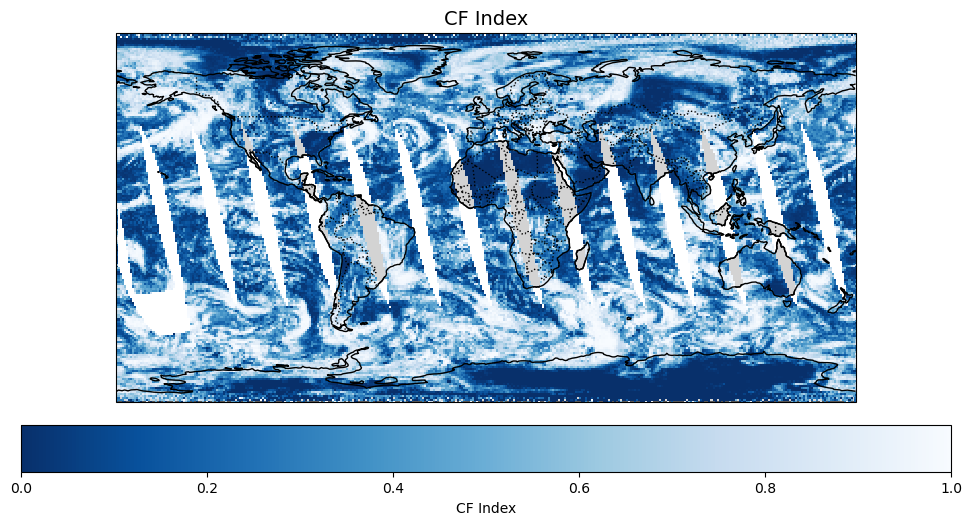

In [7]:
plot_cf_map(cloud_fraction_a)

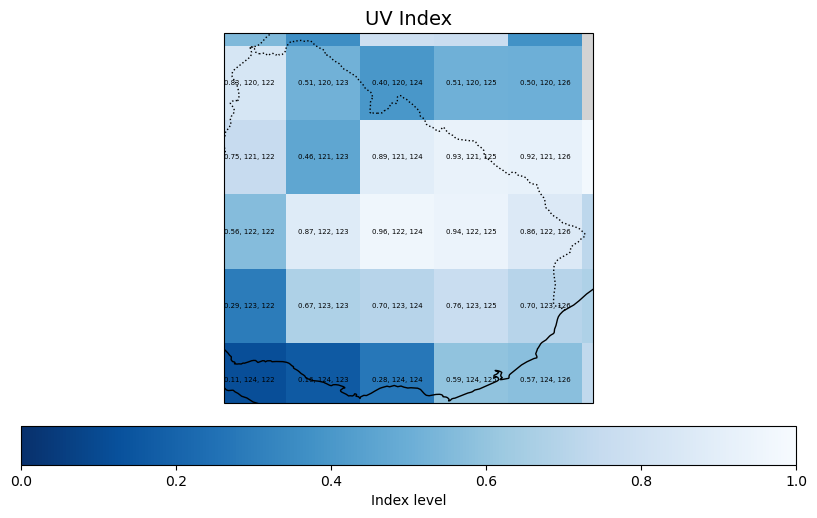

In [8]:
plot_cf_map_uruguay(cloud_fraction_a)

# Data Extract

In [9]:
def extract_uruguay_cf_from_file(file_path):
    
    hdf = SD(file_path, SDC.READ)
    
    # Extract Cloud Fraction for Ascending Orbit
    cloud_fraction_a = hdf.select("CloudFrc_A")[:]
    cloud_fraction_d = hdf.select("CloudFrc_D")[:]
    
    # Mask invalid values (-9999 to NaN)
    cloud_fraction_a = np.where(cloud_fraction_a < 0, np.nan, cloud_fraction_a)
    cloud_fraction_d = np.where(cloud_fraction_d < 0, np.nan, cloud_fraction_d)

    # Extract UV values using correct slicing
    uy_cloud_fraction_a = cloud_fraction_a[120:125,122:127]
    uy_cloud_fraction_d = cloud_fraction_d[120:125,122:127]
    
    return uy_cloud_fraction_a

In [10]:
uruguay_cf_data = {}
folder_path = "AIRS3STD v7.0"
for filename in os.listdir(folder_path):
    if filename.endswith(".hdf"):
        print(filename)
        file_path = os.path.join(folder_path, filename)
        
        uruguay_cf_data[filename] = extract_uruguay_cf_from_file(file_path)

AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G20159234440.hdf
AIRS.2011.01.01.L3.RetStd_IR001.v7.0.3.0.G20156155449.hdf
AIRS.2011.01.02.L3.RetStd_IR001.v7.0.3.0.G20156163541.hdf
AIRS.2011.01.03.L3.RetStd_IR001.v7.0.3.0.G20156164823.hdf
AIRS.2011.01.04.L3.RetStd_IR001.v7.0.3.0.G20156155739.hdf
AIRS.2011.01.05.L3.RetStd_IR001.v7.0.3.0.G20156155812.hdf
AIRS.2011.01.06.L3.RetStd_IR001.v7.0.3.0.G20156155921.hdf
AIRS.2011.01.07.L3.RetStd_IR001.v7.0.3.0.G20156160023.hdf
AIRS.2011.01.08.L3.RetStd_IR001.v7.0.3.0.G20156160253.hdf
AIRS.2011.01.09.L3.RetStd_IR001.v7.0.3.0.G20156161214.hdf
AIRS.2011.01.10.L3.RetStd_IR001.v7.0.3.0.G20156161600.hdf
AIRS.2011.01.11.L3.RetStd_IR001.v7.0.3.0.G20156161734.hdf
AIRS.2011.01.12.L3.RetStd_IR001.v7.0.3.0.G20156161628.hdf
AIRS.2011.01.13.L3.RetStd_IR001.v7.0.3.0.G20156161546.hdf
AIRS.2011.01.14.L3.RetStd_IR001.v7.0.3.0.G20156161949.hdf
AIRS.2011.01.15.L3.RetStd_IR001.v7.0.3.0.G20156163757.hdf
AIRS.2011.01.16.L3.RetStd_IR001.v7.0.3.0.G20156163649.hdf
AIRS.2011.01.1

AIRS.2011.05.22.L3.RetStd_IR001.v7.0.3.0.G20157093300.hdf
AIRS.2011.05.23.L3.RetStd_IR001.v7.0.3.0.G20157093638.hdf
AIRS.2011.05.24.L3.RetStd_IR001.v7.0.3.0.G20157093640.hdf
AIRS.2011.05.25.L3.RetStd_IR001.v7.0.3.0.G20157093842.hdf
AIRS.2011.05.26.L3.RetStd_IR001.v7.0.3.0.G20157094202.hdf
AIRS.2011.05.27.L3.RetStd_IR001.v7.0.3.0.G20157094320.hdf
AIRS.2011.05.28.L3.RetStd_IR001.v7.0.3.0.G20157094533.hdf
AIRS.2011.05.29.L3.RetStd_IR001.v7.0.3.0.G20157094742.hdf
AIRS.2011.05.30.L3.RetStd_IR001.v7.0.3.0.G20157095152.hdf
AIRS.2011.05.31.L3.RetStd_IR001.v7.0.3.0.G20157095435.hdf
AIRS.2011.06.01.L3.RetStd_IR001.v7.0.3.0.G20157100510.hdf
AIRS.2011.06.02.L3.RetStd_IR001.v7.0.3.0.G20157100442.hdf
AIRS.2011.06.03.L3.RetStd_IR001.v7.0.3.0.G20157100426.hdf
AIRS.2011.06.04.L3.RetStd_IR001.v7.0.3.0.G20157100506.hdf
AIRS.2011.06.05.L3.RetStd_IR001.v7.0.3.0.G20157101150.hdf
AIRS.2011.06.06.L3.RetStd_IR001.v7.0.3.0.G20157101023.hdf
AIRS.2011.06.07.L3.RetStd_IR001.v7.0.3.0.G20157101526.hdf
AIRS.2011.06.0

AIRS.2011.10.11.L3.RetStd_IR001.v7.0.3.0.G20157231340.hdf
AIRS.2011.10.12.L3.RetStd_IR001.v7.0.3.0.G20157230052.hdf
AIRS.2011.10.13.L3.RetStd_IR001.v7.0.3.0.G20157230736.hdf
AIRS.2011.10.14.L3.RetStd_IR001.v7.0.3.0.G20157230124.hdf
AIRS.2011.10.15.L3.RetStd_IR001.v7.0.3.0.G20157231335.hdf
AIRS.2011.10.16.L3.RetStd_IR001.v7.0.3.0.G20157230726.hdf
AIRS.2011.10.17.L3.RetStd_IR001.v7.0.3.0.G20157230833.hdf
AIRS.2011.10.18.L3.RetStd_IR001.v7.0.3.0.G20157230309.hdf
AIRS.2011.10.19.L3.RetStd_IR001.v7.0.3.0.G20157230643.hdf
AIRS.2011.10.20.L3.RetStd_IR001.v7.0.3.0.G20157231157.hdf
AIRS.2011.10.21.L3.RetStd_IR001.v7.0.3.0.G20157230549.hdf
AIRS.2011.10.22.L3.RetStd_IR001.v7.0.3.0.G20157230800.hdf
AIRS.2011.10.23.L3.RetStd_IR001.v7.0.3.0.G20157232154.hdf
AIRS.2011.10.24.L3.RetStd_IR001.v7.0.3.0.G20157230730.hdf
AIRS.2011.10.25.L3.RetStd_IR001.v7.0.3.0.G20157230536.hdf
AIRS.2011.10.26.L3.RetStd_IR001.v7.0.3.0.G20157231754.hdf
AIRS.2011.10.27.L3.RetStd_IR001.v7.0.3.0.G20157230641.hdf
AIRS.2011.10.2

AIRS.2012.03.02.L3.RetStd_IR001.v7.0.3.0.G20153174747.hdf
AIRS.2012.03.03.L3.RetStd_IR001.v7.0.3.0.G20153184915.hdf
AIRS.2012.03.04.L3.RetStd_IR001.v7.0.3.0.G20153184943.hdf
AIRS.2012.03.05.L3.RetStd_IR001.v7.0.3.0.G20153174749.hdf
AIRS.2012.03.06.L3.RetStd_IR001.v7.0.3.0.G20153174632.hdf
AIRS.2012.03.07.L3.RetStd_IR001.v7.0.3.0.G20153174708.hdf
AIRS.2012.03.08.L3.RetStd_IR001.v7.0.3.0.G20153175001.hdf
AIRS.2012.03.09.L3.RetStd_IR001.v7.0.3.0.G20153175351.hdf
AIRS.2012.03.10.L3.RetStd_IR001.v7.0.3.0.G20153175401.hdf
AIRS.2012.03.11.L3.RetStd_IR001.v7.0.3.0.G20153175425.hdf
AIRS.2012.03.12.L3.RetStd_IR001.v7.0.3.0.G20153181232.hdf
AIRS.2012.03.13.L3.RetStd_IR001.v7.0.3.0.G20153181442.hdf
AIRS.2012.03.14.L3.RetStd_IR001.v7.0.3.0.G20153185801.hdf
AIRS.2012.03.15.L3.RetStd_IR001.v7.0.3.0.G20153184352.hdf
AIRS.2012.03.16.L3.RetStd_IR001.v7.0.3.0.G20153181647.hdf
AIRS.2012.03.17.L3.RetStd_IR001.v7.0.3.0.G20153181458.hdf
AIRS.2012.03.18.L3.RetStd_IR001.v7.0.3.0.G20153181450.hdf
AIRS.2012.03.1

AIRS.2012.07.25.L3.RetStd_IR001.v7.0.3.0.G20155173141.hdf
AIRS.2012.07.26.L3.RetStd_IR001.v7.0.3.0.G20155174511.hdf
AIRS.2012.07.27.L3.RetStd_IR001.v7.0.3.0.G20155185728.hdf
AIRS.2012.07.28.L3.RetStd_IR001.v7.0.3.0.G20155185754.hdf
AIRS.2012.07.29.L3.RetStd_IR001.v7.0.3.0.G20155190157.hdf
AIRS.2012.07.30.L3.RetStd_IR001.v7.0.3.0.G20155190245.hdf
AIRS.2012.07.31.L3.RetStd_IR001.v7.0.3.0.G20155190641.hdf
AIRS.2012.08.01.L3.RetStd_IR001.v7.0.3.0.G20155190649.hdf
AIRS.2012.08.02.L3.RetStd_IR001.v7.0.3.0.G20155191151.hdf
AIRS.2012.08.03.L3.RetStd_IR001.v7.0.3.0.G20155191346.hdf
AIRS.2012.08.04.L3.RetStd_IR001.v7.0.3.0.G20155191805.hdf
AIRS.2012.08.05.L3.RetStd_IR001.v7.0.3.0.G20155192246.hdf
AIRS.2012.08.06.L3.RetStd_IR001.v7.0.3.0.G20155192128.hdf
AIRS.2012.08.07.L3.RetStd_IR001.v7.0.3.0.G20155193159.hdf
AIRS.2012.08.08.L3.RetStd_IR001.v7.0.3.0.G20155192720.hdf
AIRS.2012.08.09.L3.RetStd_IR001.v7.0.3.0.G20155223449.hdf
AIRS.2012.08.10.L3.RetStd_IR001.v7.0.3.0.G20155223811.hdf
AIRS.2012.08.1

AIRS.2012.12.15.L3.RetStd_IR001.v7.0.3.0.G20156130440.hdf
AIRS.2012.12.16.L3.RetStd_IR001.v7.0.3.0.G20156130701.hdf
AIRS.2012.12.17.L3.RetStd_IR001.v7.0.3.0.G20156130549.hdf
AIRS.2012.12.18.L3.RetStd_IR001.v7.0.3.0.G20156131149.hdf
AIRS.2012.12.19.L3.RetStd_IR001.v7.0.3.0.G20156140619.hdf
AIRS.2012.12.20.L3.RetStd_IR001.v7.0.3.0.G20156135910.hdf
AIRS.2012.12.21.L3.RetStd_IR001.v7.0.3.0.G20156131646.hdf
AIRS.2012.12.22.L3.RetStd_IR001.v7.0.3.0.G20156131526.hdf
AIRS.2012.12.23.L3.RetStd_IR001.v7.0.3.0.G20156140252.hdf
AIRS.2012.12.24.L3.RetStd_IR001.v7.0.3.0.G20156140313.hdf
AIRS.2012.12.25.L3.RetStd_IR001.v7.0.3.0.G20156133227.hdf
AIRS.2012.12.26.L3.RetStd_IR001.v7.0.3.0.G20156133443.hdf
AIRS.2012.12.27.L3.RetStd_IR001.v7.0.3.0.G20156134207.hdf
AIRS.2012.12.28.L3.RetStd_IR001.v7.0.3.0.G20156134516.hdf
AIRS.2012.12.29.L3.RetStd_IR001.v7.0.3.0.G20156134907.hdf
AIRS.2012.12.30.L3.RetStd_IR001.v7.0.3.0.G20156135006.hdf
AIRS.2012.12.31.L3.RetStd_IR001.v7.0.3.0.G20156140330.hdf
AIRS.2013.01.0

AIRS.2013.05.10.L3.RetStd_IR001.v7.0.3.0.G20151141317.hdf
AIRS.2013.05.11.L3.RetStd_IR001.v7.0.3.0.G20151141438.hdf
AIRS.2013.05.12.L3.RetStd_IR001.v7.0.3.0.G20151141459.hdf
AIRS.2013.05.13.L3.RetStd_IR001.v7.0.3.0.G20151141325.hdf
AIRS.2013.05.14.L3.RetStd_IR001.v7.0.3.0.G20151142028.hdf
AIRS.2013.05.15.L3.RetStd_IR001.v7.0.3.0.G20151184525.hdf
AIRS.2013.05.16.L3.RetStd_IR001.v7.0.3.0.G20151155139.hdf
AIRS.2013.05.17.L3.RetStd_IR001.v7.0.3.0.G20151141601.hdf
AIRS.2013.05.18.L3.RetStd_IR001.v7.0.3.0.G20151141748.hdf
AIRS.2013.05.19.L3.RetStd_IR001.v7.0.3.0.G20151142232.hdf
AIRS.2013.05.20.L3.RetStd_IR001.v7.0.3.0.G20151185448.hdf
AIRS.2013.05.21.L3.RetStd_IR001.v7.0.3.0.G20153090822.hdf
AIRS.2013.05.22.L3.RetStd_IR001.v7.0.3.0.G20151190929.hdf
AIRS.2013.05.23.L3.RetStd_IR001.v7.0.3.0.G20151142154.hdf
AIRS.2013.05.24.L3.RetStd_IR001.v7.0.3.0.G20151142046.hdf
AIRS.2013.05.25.L3.RetStd_IR001.v7.0.3.0.G20151142148.hdf
AIRS.2013.05.26.L3.RetStd_IR001.v7.0.3.0.G20151142306.hdf
AIRS.2013.05.2

AIRS.2013.09.29.L3.RetStd_IR001.v7.0.3.0.G20151165116.hdf
AIRS.2013.09.30.L3.RetStd_IR001.v7.0.3.0.G20151165138.hdf
AIRS.2013.10.01.L3.RetStd_IR001.v7.0.3.0.G20151165255.hdf
AIRS.2013.10.02.L3.RetStd_IR001.v7.0.3.0.G20151165253.hdf
AIRS.2013.10.03.L3.RetStd_IR001.v7.0.3.0.G20151165455.hdf
AIRS.2013.10.04.L3.RetStd_IR001.v7.0.3.0.G20151165605.hdf
AIRS.2013.10.05.L3.RetStd_IR001.v7.0.3.0.G20151165638.hdf
AIRS.2013.10.06.L3.RetStd_IR001.v7.0.3.0.G20151165836.hdf
AIRS.2013.10.07.L3.RetStd_IR001.v7.0.3.0.G20151170016.hdf
AIRS.2013.10.08.L3.RetStd_IR001.v7.0.3.0.G20151170056.hdf
AIRS.2013.10.09.L3.RetStd_IR001.v7.0.3.0.G20151170246.hdf
AIRS.2013.10.10.L3.RetStd_IR001.v7.0.3.0.G20151170301.hdf
AIRS.2013.10.11.L3.RetStd_IR001.v7.0.3.0.G20151170449.hdf
AIRS.2013.10.12.L3.RetStd_IR001.v7.0.3.0.G20151170523.hdf
AIRS.2013.10.13.L3.RetStd_IR001.v7.0.3.0.G20151170758.hdf
AIRS.2013.10.14.L3.RetStd_IR001.v7.0.3.0.G20151214917.hdf
AIRS.2013.10.15.L3.RetStd_IR001.v7.0.3.0.G20151184226.hdf
AIRS.2013.10.1

AIRS.2014.02.21.L3.RetStd_IR001.v7.0.3.0.G20150133627.hdf
AIRS.2014.02.22.L3.RetStd_IR001.v7.0.3.0.G20150133103.hdf
AIRS.2014.02.23.L3.RetStd_IR001.v7.0.3.0.G20150133254.hdf
AIRS.2014.02.24.L3.RetStd_IR001.v7.0.3.0.G20150133653.hdf
AIRS.2014.02.25.L3.RetStd_IR001.v7.0.3.0.G20150133901.hdf
AIRS.2014.02.26.L3.RetStd_IR001.v7.0.3.0.G20150133925.hdf
AIRS.2014.02.27.L3.RetStd_IR001.v7.0.3.0.G20150133919.hdf
AIRS.2014.02.28.L3.RetStd_IR001.v7.0.3.0.G20150133846.hdf
AIRS.2014.03.01.L3.RetStd_IR001.v7.0.3.0.G20150133920.hdf
AIRS.2014.03.02.L3.RetStd_IR001.v7.0.3.0.G20150133918.hdf
AIRS.2014.03.03.L3.RetStd_IR001.v7.0.3.0.G20150133852.hdf
AIRS.2014.03.04.L3.RetStd_IR001.v7.0.3.0.G20150133903.hdf
AIRS.2014.03.05.L3.RetStd_IR001.v7.0.3.0.G20150133845.hdf
AIRS.2014.03.06.L3.RetStd_IR001.v7.0.3.0.G20150134153.hdf
AIRS.2014.03.07.L3.RetStd_IR001.v7.0.3.0.G20150134728.hdf
AIRS.2014.03.08.L3.RetStd_IR001.v7.0.3.0.G20150134923.hdf
AIRS.2014.03.09.L3.RetStd_IR001.v7.0.3.0.G20150133913.hdf
AIRS.2014.03.1

AIRS.2014.07.19.L3.RetStd_IR001.v7.0.3.0.G20150155351.hdf
AIRS.2014.07.20.L3.RetStd_IR001.v7.0.3.0.G20150155446.hdf
AIRS.2014.07.21.L3.RetStd_IR001.v7.0.3.0.G20150155557.hdf
AIRS.2014.07.22.L3.RetStd_IR001.v7.0.3.0.G20150155719.hdf
AIRS.2014.07.23.L3.RetStd_IR001.v7.0.3.0.G20150174428.hdf
AIRS.2014.07.24.L3.RetStd_IR001.v7.0.3.0.G20150165044.hdf
AIRS.2014.07.25.L3.RetStd_IR001.v7.0.3.0.G20150160052.hdf
AIRS.2014.07.26.L3.RetStd_IR001.v7.0.3.0.G20150160136.hdf
AIRS.2014.07.27.L3.RetStd_IR001.v7.0.3.0.G20150160100.hdf
AIRS.2014.07.28.L3.RetStd_IR001.v7.0.3.0.G20150160211.hdf
AIRS.2014.07.29.L3.RetStd_IR001.v7.0.3.0.G20150160409.hdf
AIRS.2014.07.30.L3.RetStd_IR001.v7.0.3.0.G20150160321.hdf
AIRS.2014.07.31.L3.RetStd_IR001.v7.0.3.0.G20150160429.hdf
AIRS.2014.08.01.L3.RetStd_IR001.v7.0.3.0.G20150160444.hdf
AIRS.2014.08.02.L3.RetStd_IR001.v7.0.3.0.G20150160718.hdf
AIRS.2014.08.03.L3.RetStd_IR001.v7.0.3.0.G20150160720.hdf
AIRS.2014.08.04.L3.RetStd_IR001.v7.0.3.0.G20150161119.hdf
AIRS.2014.08.0

AIRS.2014.12.09.L3.RetStd_IR001.v7.0.3.0.G20150181157.hdf
AIRS.2014.12.10.L3.RetStd_IR001.v7.0.3.0.G20150181142.hdf
AIRS.2014.12.11.L3.RetStd_IR001.v7.0.3.0.G20150181206.hdf
AIRS.2014.12.12.L3.RetStd_IR001.v7.0.3.0.G20150181244.hdf
AIRS.2014.12.13.L3.RetStd_IR001.v7.0.3.0.G20150181216.hdf
AIRS.2014.12.14.L3.RetStd_IR001.v7.0.3.0.G20150181228.hdf
AIRS.2014.12.15.L3.RetStd_IR001.v7.0.3.0.G20150181927.hdf
AIRS.2014.12.16.L3.RetStd_IR001.v7.0.3.0.G20150184459.hdf
AIRS.2014.12.17.L3.RetStd_IR001.v7.0.3.0.G20150194452.hdf
AIRS.2014.12.18.L3.RetStd_IR001.v7.0.3.0.G20150194526.hdf
AIRS.2014.12.19.L3.RetStd_IR001.v7.0.3.0.G20150185151.hdf
AIRS.2014.12.20.L3.RetStd_IR001.v7.0.3.0.G20150185209.hdf
AIRS.2014.12.21.L3.RetStd_IR001.v7.0.3.0.G20150185327.hdf
AIRS.2014.12.22.L3.RetStd_IR001.v7.0.3.0.G20150185435.hdf
AIRS.2014.12.23.L3.RetStd_IR001.v7.0.3.0.G20150185535.hdf
AIRS.2014.12.24.L3.RetStd_IR001.v7.0.3.0.G20150185456.hdf
AIRS.2014.12.25.L3.RetStd_IR001.v7.0.3.0.G20150185612.hdf
AIRS.2014.12.2

In [11]:
x = []
X = []

for value in uruguay_cf_data.keys():
    s_i = 59
    for i in range(uruguay_cf_data[value].shape[0]):
        s_j = 122
        for j in range(uruguay_cf_data[value].shape[1]):
            x = []
            x.append(value)
            x.append(f"{value[5:9]}-{value[10:12]}-{value[13:15]}")
            x.append(s_i)
            x.append(s_j)
            x.append(uruguay_cf_data[value][i,j])
            
            X.append(x)
            s_j = s_j + 1
        s_i = s_i - 1
        
X = np.asarray(X)

In [12]:
pd.DataFrame(X,columns = ['File_Name','Date','Latitude', 'Longitude', 'CF_Index'])

,File_Name,Date,Latitude,Longitude,CF_Index
0,AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G2015...,2010-12-31,59,122,0.32226562
1,AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G2015...,2010-12-31,59,123,0.5
2,AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G2015...,2010-12-31,59,124,0.26171875
3,AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G2015...,2010-12-31,59,125,0.18945312
4,AIRS.2010.12.31.L3.RetStd_IR001.v7.0.3.0.G2015...,2010-12-31,59,126,0.24902344
...,...,...,...,...,...
36345,AIRS.2014.12.30.L3.RetStd_IR001.v7.0.3.0.G2015...,2014-12-30,55,122,0.072753906
36346,AIRS.2014.12.30.L3.RetStd_IR001.v7.0.3.0.G2015...,2014-12-30,55,123,0.07324219
36347,AIRS.2014.12.30.L3.RetStd_IR001.v7.0.3.0.G2015...,2014-12-30,55,124,0.49023438
36348,AIRS.2014.12.30.L3.RetStd_IR001.v7.0.3.0.G2015...,2014-12-30,55,125,0.75390625


In [13]:
pd.DataFrame(X,columns = ['File_Name','Date','Latitude', 'Longitude', 'CF_Index']).to_excel('AIRS3STD v7.0 3.xlsx', index = False)